### Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import joblib

### Importing dataset

In [2]:
dataset = pd.read_csv("newdatas.csv")
data = dataset

In [3]:
data.head()

,time,temperature,relative_humidity,dew_point,apparent_temperature,precipitation_probability,rain,surface_pressure,cloud_cover,visibility,wind_speed,soil_temperature
0,2024-07-07T07:00,20.4,63,13.1,18.3,0,0.0,899.4,0,24140.0,20.9,21.9
1,2024-07-07T08:00,21.5,53,11.5,18.3,0,0.0,900.1,26,24140.0,25.1,24.9
2,2024-07-07T09:00,23.0,45,10.4,19.5,0,0.0,899.9,2,24140.0,24.6,28.5
3,2024-07-07T10:00,24.4,44,11.4,21.7,0,0.0,900.0,6,24140.0,24.8,31.8
4,2024-07-07T11:00,25.8,42,12.0,23.8,0,0.0,899.8,22,24140.0,26.3,34.4


In [4]:
yazi = data.loc[0]["time"]
print(yazi)
newYazi = yazi.split("T")[1]
print(newYazi)

2024-07-07T07:00
07:00


In [5]:
for i in range(len(data)):
    yazi = data.loc[i, "time"]
    newYazi = yazi.split("T")[1]
    data.loc[i, "time"] = newYazi

In [6]:
for i in range(len(data)):
    saat = data.loc[i, "time"]
    newSaat = saat.split(":")[0]
    data.loc[i, "time"] = newSaat

In [7]:
data.head()

,time,temperature,relative_humidity,dew_point,apparent_temperature,precipitation_probability,rain,surface_pressure,cloud_cover,visibility,wind_speed,soil_temperature
0,07,20.4,63,13.1,18.3,0,0.0,899.4,0,24140.0,20.9,21.9
1,08,21.5,53,11.5,18.3,0,0.0,900.1,26,24140.0,25.1,24.9
2,09,23.0,45,10.4,19.5,0,0.0,899.9,2,24140.0,24.6,28.5
3,10,24.4,44,11.4,21.7,0,0.0,900.0,6,24140.0,24.8,31.8
4,11,25.8,42,12.0,23.8,0,0.0,899.8,22,24140.0,26.3,34.4


### Training the model

In [8]:
X = data.drop("temperature", axis=1)
y = data["temperature"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [11]:
y_pred = model.predict(X_test)

### Validating

In [12]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 0.2512471910112352
Mean Squared Error (MSE): 0.13073726516853876
Root Mean Squared Error (RMSE): 0.3615760848957502
R-squared (R²): 0.9952001978697654


## Visualizing

In [13]:
data.head()

,time,temperature,relative_humidity,dew_point,apparent_temperature,precipitation_probability,rain,surface_pressure,cloud_cover,visibility,wind_speed,soil_temperature
0,07,20.4,63,13.1,18.3,0,0.0,899.4,0,24140.0,20.9,21.9
1,08,21.5,53,11.5,18.3,0,0.0,900.1,26,24140.0,25.1,24.9
2,09,23.0,45,10.4,19.5,0,0.0,899.9,2,24140.0,24.6,28.5
3,10,24.4,44,11.4,21.7,0,0.0,900.0,6,24140.0,24.8,31.8
4,11,25.8,42,12.0,23.8,0,0.0,899.8,22,24140.0,26.3,34.4


In [14]:
veriAdeti = 100
tahminYapilacakVeriler = data.drop("temperature", axis=1)[:veriAdeti]
y_pred2 = model.predict(tahminYapilacakVeriler)
saatler = data["time"][:veriAdeti]
gercekSicakliklar = data["temperature"][:veriAdeti]

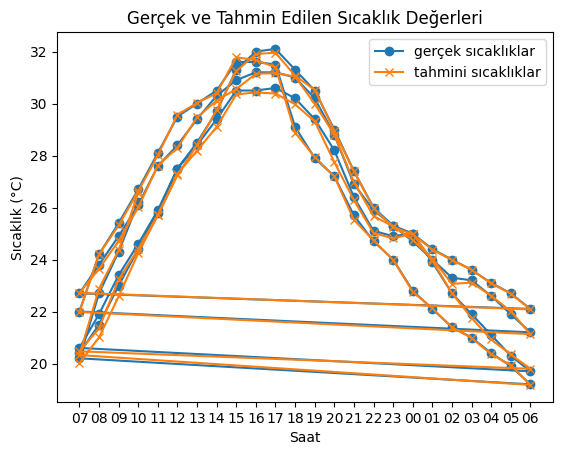

In [15]:
plt.plot(saatler, gercekSicakliklar, label="gerçek sıcaklıklar", marker="o")
plt.plot(saatler, y_pred2, label="tahmini sıcaklıklar", marker="x")

plt.title("Gerçek ve Tahmin Edilen Sıcaklık Değerleri")
plt.xlabel("Saat")
plt.ylabel("Sıcaklık (°C)")
plt.legend()

plt.show()

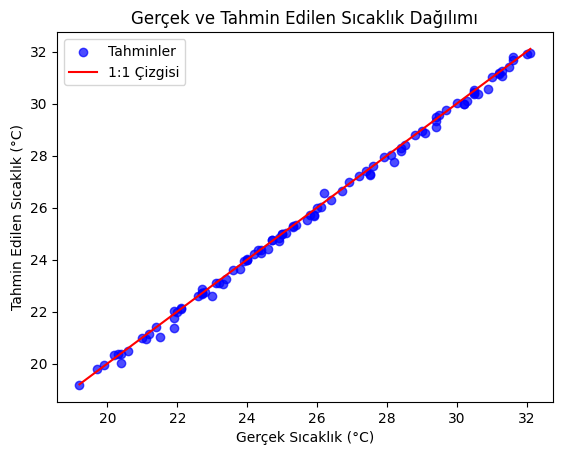

In [16]:
plt.scatter(gercekSicakliklar, y_pred2, color='blue', label='Tahminler', alpha=0.7)

plt.plot([min(gercekSicakliklar), max(gercekSicakliklar)], [min(gercekSicakliklar), max(gercekSicakliklar)], color='red', label='1:1 Çizgisi')

plt.title("Gerçek ve Tahmin Edilen Sıcaklık Dağılımı")
plt.xlabel("Gerçek Sıcaklık (°C)")
plt.ylabel("Tahmin Edilen Sıcaklık (°C)")
plt.legend()

plt.show()

### Exporting the model

In [17]:
joblib.dump(model, "model_dosyasi.pkl")

['model_dosyasi.pkl']